<a href="https://colab.research.google.com/github/tlaud1023/ITB2022/blob/main/IBT%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C_%EB%B2%95%ED%95%99%EB%B6%802011681%EC%9D%B4%EC%8B%9C%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# 외부 화일을 가져와서 데이터프레임으로 저장하기 
fpath = 'https://raw.githubusercontent.com/tlaud1023/ITB2022/main/health_data.csv' #github에서 url로 바로 가져옴(raw)
hd = pd.read_csv(fpath) #url변수 삽입

print(type(hd))
display(hd)

<class 'pandas.core.frame.DataFrame'>


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
hd.info()
#88개 NA : 수축기혈압,이완기혈압, 식전혈당(공복혈당), 혈색소, 혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피
#5956개 NA : 총콜레스테롤,트리글리세라이드, HDL콜레스테롤
#6023개 NA : LDL콜레스테롤
#6749개 NA : 치아우식증유무, 치석
#139개 NA : 요단백
#2개 NA : 흡연상태
#1개 NA : 음주여부

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

# **1. 기술통계 정보 살펴보기**

In [ ]:
#기준년도, 가입자일련번호, 시도코드는 문자로 변환하여 필요한 기술통계 정보만 확인하기
hd['기준년도'] = hd['기준년도'].astype(str)
hd['가입자일련번호'] = hd['가입자일련번호'].astype(str)
hd['시도코드'] = hd['시도코드'].astype(str)

In [ ]:
hd.describe() #수치형데이터만

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,9912.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,76.789750,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,9.931527,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,130.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [ ]:
hd.describe(include='all') # 문자 데이터의 특성도 함께 출력 (빈도, 고유값 빈도unique, 최빈값top, 최빈값 빈도)
#흡연상태 : No, Yes, NotNOw 3개의 범주
#성별 남자가 더 많고, 5138명
#흡연상태는 비흡연자가 더 많고, 6231명
#음주여부는 음주를 하는 사람이 더 많고, 5819명
#데이터는 모두 2021년 12월 29일에 공개되었다.

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9912.000000,9912.00000,9912.000000,9912.000000,9998,9999,10000.000000,3251.000000,3251.000000,10000
unique,1,10000,17,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1
top,2020,1,41,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,12/29/2021
freq,10000,1,2495,5138,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6231,5819,NaN,NaN,NaN,10000
mean,NaN,NaN,NaN,NaN,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,...,0.848484,27.58979,26.789851,38.098668,NaN,NaN,0.325100,0.175331,0.579514,NaN
std,NaN,NaN,NaN,NaN,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,...,0.301012,17.88442,23.735687,58.184579,NaN,NaN,0.468436,0.380308,0.591269,NaN
min,NaN,NaN,NaN,NaN,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,...,0.050000,3.00000,2.000000,3.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,0.700000,20.00000,16.000000,16.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,0.800000,24.00000,21.000000,24.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,...,1.000000,30.00000,31.000000,39.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN


# **2. 데이터 탐색과 시각화**

In [5]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/Libera

In [4]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [6]:
fm._rebuild()  # 폰트 적용

**(1) '시도코드'별 좌우시력의  평균 확인하기**

In [ ]:
#시력(좌), 시력(우)를 hd_new 데이터 프레임에서 영문명 변수로 변경하기

hd_new = hd.copy()
hd_new = hd_new.rename(columns = {'시력(좌)': 'SIGHT_LEFT'})
hd_new = hd_new.rename(columns = {'시력(우)': 'SIGHT_RIGHT'})

In [ ]:
# 시도코드 별로 모든 수치 변수의 평균값을 구함 
means = hd_new.groupby('시도코드').mean()
display(means.head(17))#11~49번까지 모두 출력
means_sight = means.iloc[:,6:8]
print(means_sight)

,기준년도,가입자일련번호,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,SIGHT_LEFT,SIGHT_RIGHT,청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
시도코드,,,,,,,,,,,,,,,,,,,,,
11,2020.0,5106.349148,11.976886,160.839416,62.527372,82.172263,0.921107,0.911740,1.047445,1.044404,...,116.358900,14.180110,1.125077,0.837139,27.520565,26.667281,36.813996,0.309002,0.151575,0.608268
26,2020.0,5011.895742,11.986784,161.439060,63.465492,82.137445,0.940675,0.952570,1.046990,1.048458,...,120.597070,14.206519,1.160475,0.845778,27.537778,26.940741,37.577778,0.289280,0.258883,0.614213
27,2020.0,4917.315152,11.965657,160.878788,62.000000,81.351313,0.901010,0.895354,1.068687,1.060606,...,116.336683,14.125963,1.093686,0.870994,27.225152,26.466531,35.316430,0.268687,0.187970,0.616541
28,2020.0,4884.253119,11.885918,160.338681,62.816399,81.575401,0.918360,0.916399,1.055258,1.051693,...,123.129630,14.279820,1.181159,0.853333,27.699099,26.886486,37.587387,0.422460,0.168776,0.624473
29,2020.0,4713.750000,11.550000,162.142857,63.125000,81.074643,0.969286,0.985000,1.078571,1.057143,...,117.106796,14.205755,1.108696,0.857194,27.413669,27.334532,41.388489,0.317857,0.123596,0.348315
30,2020.0,5037.558912,12.024169,161.586103,62.749245,82.037160,0.883988,0.893656,1.045317,1.057402,...,110.724138,14.220427,1.088685,0.866768,27.469512,26.003049,33.579268,0.398792,0.113636,0.492424
31,2020.0,4990.036885,11.508197,163.073770,64.036885,82.525820,0.954918,0.970902,1.057377,1.073770,...,112.000000,14.248971,1.066116,0.839095,31.407407,29.292181,47.390947,0.545082,0.112782,0.293233
36,2020.0,5237.987013,11.519481,160.779221,62.272727,81.070130,0.989610,1.022078,1.025974,1.000000,...,132.833333,13.989474,1.092105,0.806579,24.789474,23.236842,30.157895,0.376623,0.068966,0.517241
41,2020.0,4996.785571,11.772345,161.246493,63.555110,82.802325,0.943407,0.939920,1.041683,1.034469,...,116.087179,14.254263,1.123577,0.848145,27.430303,27.052525,37.629091,0.306613,0.175163,0.677124


      SIGHT_LEFT  SIGHT_RIGHT
시도코드                         
11      0.921107     0.911740
26      0.940675     0.952570
27      0.901010     0.895354
28      0.918360     0.916399
29      0.969286     0.985000
30      0.883988     0.893656
31      0.954918     0.970902
36      0.989610     1.022078
41      0.943407     0.939920
42      0.949563     0.919825
43      0.924149     0.897833
44      0.927209     1.006977
45      0.938520     0.957143
46      0.965570     0.951899
47      0.937859     0.950669
48      0.930166     0.952338
49      0.934959     0.910569


전체적으로, 대전광역시(시도코드:30)의 좌우시력 평균은  0.883988(왼) / 0.893656(오) 로 가장 낮고, 세종특별자치치시(시도코드:36)의 평균은 0.989610(왼) / 1.022078(오) 로 가장 높다.

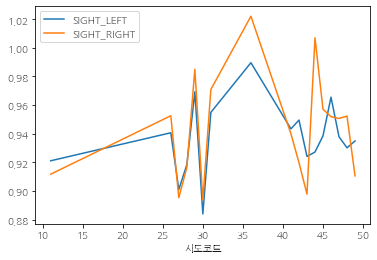

In [ ]:
#지역별 좌우시력의 평균 시각화
fm._rebuild()
means_sight.plot(kind='line')

**(2) 지역별(시도코드별) 사례의 개수 확인하기**

In [7]:
# 가장 많은 사례가 있는 지역 top 5 보여주기

SIDO_count = hd['시도코드'].value_counts()
print(SIDO_count[:5]) 

#경기도, 서울특별시, 부산광역시 순으로 많다.

41    2495
11    1644
26     681
48     663
28     561
Name: 시도코드, dtype: int64


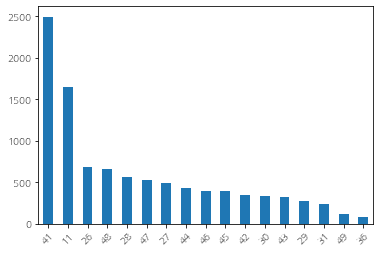

In [8]:
SIDO_count[:17].plot.bar(rot=45) #pandas 막대그래프
#경기도(41), 서울특별시(11), 부산광역시(26) 순으로 사례가 많은 것을 확인할 수 있다.

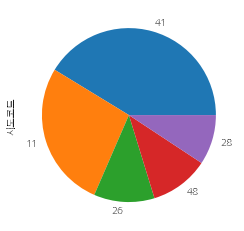

In [9]:
fm._rebuild()  # 폰트 적용
SIDO_count[:5].plot(kind='pie')   # kind = 'bar', 'line', 'pie' 등 

**(3) BMI 변수 추가 + 음주여부와 체질량 지수의 관계 확인하기**

In [10]:
# 체질량지수BMI 변수 추가
# bmi(kg/m2)(체질량지수) = (몸무게) / (키)2
# 18.5 미만이면 저체중,18.5∼22.9는 정상, 23 ~ 24.9는 비만 전 단계, 25∼29.9는 '1단계 비만', 30∼34.9는 '2단계 비만', 35이상이면 '3단계 비만'으로 구분
hd['BMI'] = hd['체중(5Kg 단위)']/((hd['신장(5Cm단위)']/100)**2) 
display(hd)


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,22.892820
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,21.484375
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,31.250000
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.892820


In [11]:
hd['BMI'] = hd['BMI'].astype(float)

In [12]:
#BMI 기준 1~3단계로 구분하여 변수에 저장

obesity_1 = hd.query('BMI >= 25 & BMI <30' )
obesity_2 = hd.query('BMI >= 30 & BMI <35' )
obesity_3 = hd.query('BMI > 35')

display(obesity_3['BMI'])

23      39.183673
373     38.062284
541     36.730946
769     36.730946
852     37.551020
          ...    
9857    35.555556
9865    35.379813
9873    35.671819
9942    37.460978
9953    35.493827
Name: BMI, Length: 72, dtype: float64

In [13]:
display(obesity_1) #display(obesity_2) #display(obesity_3) #3단계 비만은 총 72명, 2단계 비만은 433명, 1단계 비만은 3192명

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.888889
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,29.384757
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021,25.390625
12,2020,13,41,M,14,175,80,90.0,0.8,0.7,...,21.0,21.0,41.0,Yes,Yes,1,0.0,0.0,12/29/2021,26.122449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,2020,9967,11,M,15,170,80,94.0,0.8,0.8,...,24.0,14.0,26.0,No,No,0,NaN,NaN,12/29/2021,27.681661
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,12/29/2021,27.681661
9980,2020,9981,30,M,9,160,65,83.0,0.9,0.7,...,85.0,92.0,154.0,NotNow,Yes,0,NaN,NaN,12/29/2021,25.390625
9983,2020,9984,28,M,12,160,65,79.0,1.5,1.2,...,24.0,21.0,13.0,NotNow,Yes,1,0.0,0.0,12/29/2021,25.390625


In [14]:
obesity_3.groupby('음주여부').count()
obesity_3_count_DRK = obesity_3.groupby('음주여부').count()
display(obesity_3_count_DRK['BMI'])
#3단계 비만 72명 중에서 음주를 하지 않는 사람은 26명, 음주를 하는 사람은 46명으로 약 2배 가량 차이가 나는 것을 확인할 수 있다.

음주여부
No     26
Yes    46
Name: BMI, dtype: int64

In [15]:
obesity_2.groupby('음주여부').count()
obesity_2_count_DRK = obesity_2.groupby('음주여부').count()
display(obesity_2_count_DRK['BMI'])
#2단계 비만 433명 중에서 음주를 하지 않는 사람은 178명, 음주를 하는 사람은 255명

음주여부
No     178
Yes    255
Name: BMI, dtype: int64

In [16]:
obesity_1.groupby('음주여부').count()
obesity_1_count_DRK = obesity_1.groupby('음주여부').count()
display(obesity_1_count_DRK['BMI'])
#1단계 비만 3192명 중에서 음주를 하지 않는 사람은 1188명, 음주를 하는 사람은 2004명

음주여부
No     1188
Yes    2004
Name: BMI, dtype: int64

(3) BMI 변수 추가 + 음주여부와 체질량 지수의 관계 확인하기

BMI 기준 1/2/3단계로 구분하여 변수에 저장하고, 이를 음주여부를 기준으로 정렬한 뒤 count함수를 쓰면 음주여부 별로 비만의 사례를 확인할 수 있다. 실제로 1~3단계 비만 모두 음주여부가 'Yes'인 비율이 거의 2배가량 많다.
원 그래프로 시각화 결과를 확인하면, 1단계 비만중에서 음주여부 'yes'의 비율이 월등히 높은 것을 확인할 수 있다. 실제로 1단계 비만 3192명 중에서 음주를 하지 않는 사람은 1188명, 음주를 하는 사람은 2004명으로 약 2배 가량 차이가 나는 것을 확인할 수 있다. 이는 음주가 비만 여부에 중대한 원인으로 작용하고 있음을 시사한다.

Text(0.5, 1.0, '음주여부 별 1단계 비만 평균 추이')

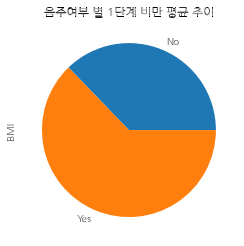

In [17]:
fm._rebuild()  # 폰트 적용
obesity_1_count_DRK['BMI'].plot(kind='pie')
plt.title("음주여부 별 1단계 비만 평균 추이")

**(4) 지역별 3단계 비만의 평균값 확인하기**

In [21]:
obesity_3.groupby('시도코드').mean()
obesity_3_mean_SIDO = obesity_3.groupby('시도코드').mean()
display(obesity_3.groupby('시도코드').mean()) #시도코드별 3단계 비만 평균값 확인
obesity_2_mean_SIDO['BMI']

,기준년도,가입자일련번호,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석,BMI
시도코드,,,,,,,,,,,,,,,,,,,,,
11,2020.0,4684.800000,10.300000,161.000000,93.500000,103.450000,0.930000,0.940000,1.000000,1.000000,...,13.440000,1.200000,0.740000,38.700000,58.300000,39.200000,0.300000,0.333333,0.333333,35.982792
26,2020.0,5966.666667,11.111111,161.111111,97.222222,106.766667,1.044444,1.011111,1.000000,1.000000,...,14.144444,1.222222,0.788889,34.333333,43.333333,66.222222,0.222222,0.000000,0.000000,37.299183
28,2020.0,7365.166667,11.333333,152.500000,83.333333,96.416667,0.633333,0.800000,1.166667,1.000000,...,13.883333,1.166667,0.733333,27.833333,28.333333,27.166667,0.666667,0.250000,0.750000,35.804632
29,2020.0,4494.500000,12.000000,160.000000,95.000000,106.500000,0.950000,0.850000,1.000000,1.000000,...,16.050000,1.000000,0.850000,46.000000,48.500000,129.500000,0.000000,NaN,NaN,37.095962
30,2020.0,8793.000000,14.000000,160.000000,90.000000,98.000000,0.800000,0.800000,1.000000,1.000000,...,12.700000,1.000000,0.900000,25.000000,29.000000,34.000000,1.000000,0.000000,1.000000,35.156250
31,2020.0,9794.000000,13.000000,160.000000,90.000000,117.000000,0.700000,0.700000,1.000000,1.000000,...,13.500000,NaN,0.800000,20.000000,26.000000,41.000000,0.000000,NaN,NaN,35.156250
41,2020.0,5099.583333,10.916667,164.166667,100.625000,108.870833,0.975000,0.995833,1.000000,1.041667,...,14.420833,1.041667,0.850000,37.708333,49.125000,66.541667,0.291667,0.142857,0.857143,37.059309
42,2020.0,4767.500000,9.500000,155.000000,85.000000,101.900000,1.200000,1.250000,1.000000,1.000000,...,13.600000,1.000000,0.600000,23.500000,27.000000,16.000000,0.500000,0.000000,0.000000,35.379813
43,2020.0,4654.000000,11.250000,155.000000,90.000000,108.150000,0.800000,0.750000,1.000000,1.000000,...,14.725000,1.000000,0.800000,30.250000,43.750000,38.250000,0.750000,1.000000,1.000000,37.472134


시도코드
11    31.758557
26    31.919454
27    31.733049
28    32.034660
29    31.991584
30    31.941164
31    31.833018
36    32.850553
41    31.793369
42    31.531785
43    31.533215
44    31.818785
45    31.496398
46    31.566050
47    31.491833
48    31.885876
49    32.172318
Name: BMI, dtype: float64

(4) 지역별 3단계 비만의 평균값 확인하기

라인 그래프를 보면, 전라북도(시도코드:45)가 3단계 비만의 평균값이 약 38로 가장 높다. 

Text(45, 38.049941, '전라북도')

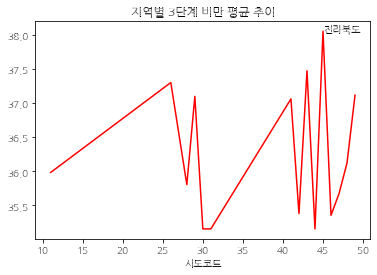

In [20]:
fm._rebuild()  # 폰트 적용
obesity_3_mean_SIDO['BMI'].plot(kind='line', color = 'r')
plt.title("지역별 3단계 비만 평균 추이")
plt.text(45,38.049941,"전라북도")

**(5) 연령별 청력 질환 의심 사례 시각화**

In [ ]:
#청력(좌), 청력(우)를 영문명 변수로 변경하기
hd_new = hd_new.rename(columns = {'청력(좌)': 'HEAR_LEFT'})
hd_new = hd_new.rename(columns = {'청력(우)': 'HEAR_RIGHT'})
#연령대코드(5세단위) > AGE_GROUP 영문 변수명으로 변경
hd_new = hd_new.rename(columns = {'연령대코드(5세단위)': 'AGE_GROUP'})

In [ ]:
#양쪽 귀 모두 청력 질환이 의심가는 사례 보여주기
#HEAR_2 : 청력질환이 의심가는 (좌,우 둘 다 측정값이 2) 사례만 추출한 데이터프레임 생성
HEAR_2 = hd_new.query('HEAR_LEFT == 2 & HEAR_RIGHT == 2')
display(HEAR_2[['HEAR_LEFT','HEAR_RIGHT']]) 
#총 251명의 사례가 존재함을 알 수 있다.

,HEAR_LEFT,HEAR_RIGHT
8,2,2
24,2,2
39,2,2
47,2,2
235,2,2
...,...,...
9765,2,2
9877,2,2
9898,2,2
9961,2,2


In [ ]:
AGE_GROUP_HEAR_2 = HEAR_2.groupby('AGE_GROUP').count()
display(AGE_GROUP_HEAR_2)
a = AGE_GROUP_HEAR_2.iloc[:,9:11] #그래프를 만들기 위한 열 추출
print(a) #연령코드 9부터 양쪽에 청력질환 의심 사례가 있다.

,기준년도,가입자일련번호,시도코드,성별코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
AGE_GROUP,,,,,,,,,,,,,,,,,,,,,
9,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,1,1,5
10,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,4,5,1,1,5
11,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,5,5,17
12,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,10,10,19
13,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,15,15,24
14,25,25,25,25,25,25,25,25,25,25,...,24,24,24,24,24,25,25,9,9,25
15,58,58,58,58,58,58,58,58,58,58,...,55,55,55,55,58,58,58,31,31,58
16,39,39,39,39,39,39,39,39,39,39,...,36,36,36,36,39,39,39,15,15,39
17,42,42,42,42,42,42,42,42,42,42,...,40,40,40,40,42,42,42,14,14,42


           HEAR_LEFT  HEAR_RIGHT
AGE_GROUP                       
9                  5           5
10                 5           5
11                17          17
12                19          19
13                24          24
14                25          25
15                58          58
16                39          39
17                42          42
18                17          17


Text(15, 58, '70-74세')

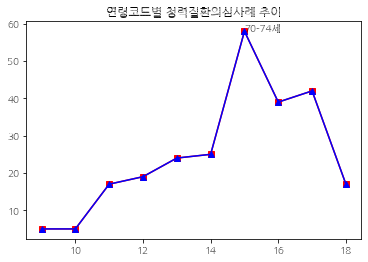

In [ ]:
fm._rebuild()  # 폰트 적용
plt.plot(a.index.tolist(), a.HEAR_LEFT, marker="s",  color='red')
plt.plot(a.index.tolist(), a.HEAR_RIGHT, marker="^",  color='blue')
plt.title("연령코드별 청력질환의심사례 추이")
plt.text(15,58,"70-74세")
#70-74세(연령코드:15)가 청력질환 의심 사례가 가장 많고, 80-84세, 75-79세가 뒤를 잇는다.
#0-39세(연령코드 : 1~8)는 청력질환 의심 사례가 아예 없다.